In [190]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [191]:
iris = load_iris()

In [192]:
X = iris.data

In [212]:
df = pd.DataFrame(X, columns=iris.feature_names)
df["target"] = iris.target
df = df[df.target <= 1]
df = df[["sepal length (cm)", "petal length (cm)", "target"]]
df["dummy"] = np.ones(df.shape[0])
df = df[["dummy", "sepal length (cm)", "petal length (cm)", "target"]]

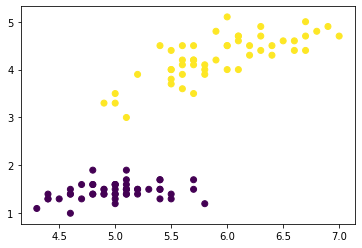

In [213]:
plt.scatter(df['sepal length (cm)'], df['petal length (cm)'], c=df["target"])

In [195]:
%%latex
\[   
y = 
     \begin{cases}
       1 &\quad\text{if }\vec{w}\cdot\vec{x}\geq 0\\
       0 &\quad\text{otherwise} \\
     \end{cases}
\]

<IPython.core.display.Latex object>

# Perceptron learning rule

It turns out that the same update rule as for linear regression is guarenteed to converge (assuming the data are linearly seperable). The update rule is as follows for a single example (x,y):

In [233]:
def update_weights(w, actual, pred, x, alpha=0.01):
    w_new = w + (alpha * (actual - pred)) * x
    return w_new

Make initial random guess at weights

In [314]:
w_ = np.ones(3)
nrows = df.shape[0]

In [316]:
for i in range(0, 1000):
    index = np.random.choice(nrows, 1, replace=True)
    x_y_ = df.values[index][0]
    y = x_y_[3]
    x_ = x_y_[0:3]
    
    w_x_ = np.dot(w_, x_)
    prediction = 1 if w_x_ >= 0 else 0
    
    if y == prediction:
        continue
    else:
        w_ = update_weights(w=w_, actual=y, pred=prediction, x=x_)

Final converged weights 

In [317]:
w_

array([ 0.71 , -0.415,  0.578])

In [318]:
def convert_weights_into_xy(weights, x_s):
    w_0 = weights[0]
    w_1 = weights[1]
    w_2 = weights[2]
    return (w_0 + (w_1 * x_s))/-w_2

In [319]:
sepal = np.linspace(4,7,30)
petal = convert_weights_into_xy(weights=w_, x_s=sepal)

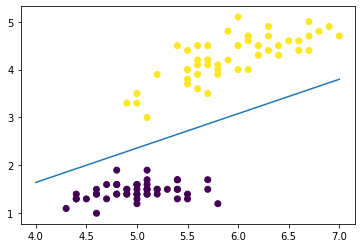

In [320]:
plt.scatter(df['sepal length (cm)'], df['petal length (cm)'], c=df["target"])
plt.plot(sepal, petal)